### 0. Setup

In [2]:
import pandas as pd
import numpy as np
import os

os.getcwd()

os.chdir("/Users/amymiao/Documents/UC Berkeley/Fall 8.27-12.16/Applied Computing/final-project-repo-group-four")

In [3]:

df = pd.read_csv("data/clean_processed.csv")

In [4]:
df.head()

# we work on Lyrics, full sentence

,Year,Artist,Song Title,Rank,Lyrics,Nouns,Verbs,Adverbs,Corpus,Word Counts,Unique Word Counts
0,1959,Johnny Horton,The Battle Of New Orleans,1,In 1814 we took a little trip Along with Colo...,trip bacon bean town gun comin while river of'...,take take take catch fire keep be be fire begi...,along as ago once more so as ago once more the...,take little trip colonel jackson mighty missis...,435,155
1,1959,Bobby Darin,Mack The Knife,2,"Oh the shark, babe Has such teeth, dear And he...",shark babe tooth jackknife babe sight shark to...,have show have keep know bite billow spread be...,pearly just so never never now just just down ...,oh shark babe tooth dear show pearly white jac...,224,145
2,1959,Lloyd Price,Personality,3,Over and over I tried to prove my love to you ...,love friend fool fool personality personality ...,try prove do say get get do cause get get do s...,over over over over over over so over now over...,try prove love friend say fool fool cause get ...,215,55
3,1959,Frankie Avalon,Venus,4,"Hey, Venus! Oh, Venus! Venus, if you will Ple...",girl girl kiss arm girl charm girl sunlight ha...,send thrill want make take place ask promise g...,surely too always as long surely too always as...,hey venus oh venus venus send little girl thri...,166,74
4,1959,Paul Anka,Lonely Boy,5,I'm just a lonely boy Lonely and blue I'm all ...,boy nothing moment love night day boy nothing ...,do get think want love love kiss hold like hea...,just all just all just so hard just all,lonely boy lonely blue get think want love yes...,140,68


In [5]:
df_1960s= df[(df["Year"]>= 1960) & (df["Year"] < 1970)]
print("Number of songs in 1960s:", len(df_1960s))

Number of songs in 1960s: 942


### 1. VADER - 1960s

In [6]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [7]:
# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

In [8]:
df_1960s['vader_scores'] = df_1960s['Lyrics'].apply(
     lambda x: analyzer.polarity_scores(str(x))
)

# Extract compound score (overall sentiment)
df_1960s['vader_compound'] = df_1960s['vader_scores'].apply(lambda x: x['compound'])
df_1960s['vader_pos'] = df_1960s['vader_scores'].apply(lambda x: x['pos'])
df_1960s['vader_neg'] = df_1960s['vader_scores'].apply(lambda x: x['neg'])
df_1960s['vader_neu'] = df_1960s['vader_scores'].apply(lambda x: x['neu'])

df_1960s.head()

/var/folders/kg/rfgjdlw123303pz9m0f3kq3w0000gn/T/ipykernel_71281/3737850984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1960s['vader_scores'] = df_1960s['Lyrics'].apply(
/var/folders/kg/rfgjdlw123303pz9m0f3kq3w0000gn/T/ipykernel_71281/3737850984.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1960s['vader_compound'] = df_1960s['vader_scores'].apply(lambda x: x['compound'])
/var/folders/kg/rfgjdlw123303pz9m0f3kq3w0000gn/T/ipykernel_71281/3737850984.py:7: SettingWithCopyWarning: 
A value is 

,Year,Artist,Song Title,Rank,Lyrics,Nouns,Verbs,Adverbs,Corpus,Word Counts,Unique Word Counts,vader_scores,vader_compound,vader_pos,vader_neg,vader_neu
87,1960,Percy Faith,"Theme From ""A Summer Place""",1,There's a summer place Where it may rain or st...,summer place storm summer place arm heart care...,be rain reach know be see bless share share,anywhere anywhere,summer place rain storm safe warm summer place...,104,64,"{'neg': 0.0, 'neu': 0.603, 'pos': 0.397, 'comp...",0.9945,0.397,0.000,0.603
88,1960,Jim Reeves,He'll Have To Go,2,Put your sweet lips a little closer to the ph...,lip phone man friend way love mind word man li...,put let pretend tell turn tell have go tell lo...,little close together all alone way down low t...,sweet lip little close phone let pretend tell ...,152,76,"{'neg': 0.093, 'neu': 0.744, 'pos': 0.163, 'co...",0.9381,0.163,0.093,0.744
89,1960,Everly Brothers,Cathy's Clown,3,Don't want your love any more Don't want your...,love kiss time sound clown man lie man tear lo...,want want die hear come get stand know crawl k...,more here at all kind of so even more here,want love want kiss sure die time hear sound c...,122,71,"{'neg': 0.258, 'neu': 0.694, 'pos': 0.048, 'co...",-0.9830,0.048,0.258,0.694
90,1960,Johnny Preston,Running Bear,4,"On the bank of the river Stood Running Bear, y...",bank river side river maid name sight tribe lo...,stand see fight run love run love die swim rag...,never too fast there now always together,bank river stood running bear young indian bra...,220,100,"{'neg': 0.038, 'neu': 0.6, 'pos': 0.362, 'comp...",0.9989,0.362,0.038,0.600
91,1960,Mark Dinning,Teen Angel,5,Teen Angel Teen Angel Teen Angel VERSE 1 That...,night car railroad track angel angel love vers...,stall pull go run hear see look take say find ...,back somewhere up above still just now away ne...,teen angel teen angel teen angel verse fateful...,118,83,"{'neg': 0.033, 'neu': 0.824, 'pos': 0.144, 'co...",0.9514,0.144,0.033,0.824


In [9]:
def categorize_sentiment(vader_compound):
    """
    Categorize sentiment based on compound score.
    Adjust thresholds based on your data if needed.
    """
    if vader_compound >= 0.05:
        return 'positive'
    elif vader_compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply categorization
df_1960s['sentiment_category'] = df_1960s['vader_compound'].apply(categorize_sentiment)

# Show distribution
print("Sentiment distribution:")
print(df_1960s['sentiment_category'].value_counts())
print("\nPercentages:")
print(df_1960s['sentiment_category'].value_counts(normalize=True).round(3) * 100)

Sentiment distribution:
sentiment_category
positive    775
negative    157
neutral      10
Name: count, dtype: int64

Percentages:
sentiment_category
positive    82.3
negative    16.7
neutral      1.1
Name: proportion, dtype: float64


/var/folders/kg/rfgjdlw123303pz9m0f3kq3w0000gn/T/ipykernel_71281/419382454.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1960s['sentiment_category'] = df_1960s['vader_compound'].apply(categorize_sentiment)


In [10]:
# for the whole decade, mean
avg_score_1960s = df_1960s['vader_compound'].mean()
print(f"Average sentiment (VADER compound) for 1960s: {avg_score_1960s:.3f}")

Average sentiment (VADER compound) for 1960s: 0.626


### 2. Embedding, Clustering, TFIDF

Batches: 100%|██████████| 30/30 [00:04<00:00,  6.62it/s]
/opt/anaconda3/envs/python312/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


=== Cluster Keywords ===
[Cluster 0] man, yeah, home, ha, little, just
[Cluster 1] love, ll, oh, la, heart, night
[Cluster 2] love, girl, know, don, got, yeah
[Cluster 3] love, baby, don, ll, oh, know
[Cluster 4] baby, come, yeah, oh, got, ll

=== Cluster Representatives ===

[Cluster 0]
  Song Title         Artist                                                                                                                      Lyrics
I Get Around     Beach Boys  Round, round, get around I get around, yeah Get around, round, round, I get around I get around Get around, round, roun...
     Dang Me   Roger Miller Well, here I sit high, gettin' ideas Ain't nothin' but a fool would live like this Out all night and runnin' wild Woman'...
  Old Rivers Walter Brennan (Words and music by Crofford)  How old was I when I first seen old Rivers? I can't remember when he weren't around Well,...

[Cluster 1]
          Song Title          Artist                                                      

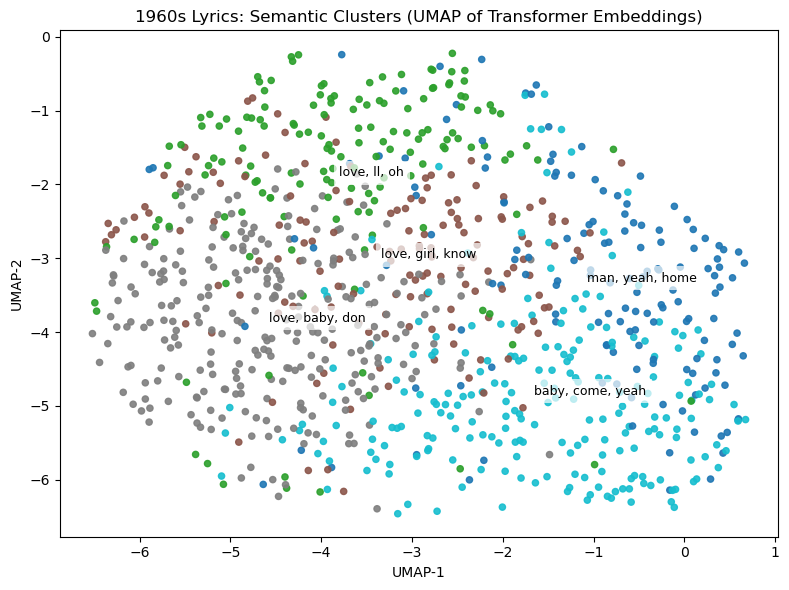


=== Cluster Summary ===
 cluster  size                                                 keywords
       0   148 man, yeah, home, ha, little, just, got, let, land, round
       1   158   love, ll, oh, la, heart, night, just, world, time, day
       2   151    love, girl, know, don, got, yeah, oh, just, woman, ll
       3   265    love, baby, don, ll, oh, know, heart, want, just, say
       4   220    baby, come, yeah, oh, got, ll, like, let, little, don


In [ ]:
# ========= 0) Imports & Params =========
# pip install sentence-transformers umap-learn scikit-learn matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import umap

SEED = 42
K = 5                    # kmeans 5 clusters
N_NEIGHBORS = 10         # UMAP 局部结构
MIN_DIST = 0.30          # UMAP 点的紧密程度
TOPN_KEYWORDS = 10       # 10 top words for each cluster
TOPN_REPRESENTATIVES = 3 # 3 songs as representatives

# ========= 1) Data Prep =========
# 期望 df_1960s 至少包含 'Lyrics' 列；可选：'Song Title' 或 'Song'，'Artist'
df = df_1960s.copy()
df = df[df['Lyrics'].notna()].copy()
df['Lyrics'] = df['Lyrics'].astype(str)
df.reset_index(drop=True, inplace=True)

# ========= 2) Embedding (Transformer) =========
# 用预训练模型把每首歌词转为语义向量；normalize=True 便于距离/聚类稳定
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df['Lyrics'].tolist(), show_progress_bar=True, normalize_embeddings=True)

# ========= 3) Clustering (KMeans on embeddings) =========
kmeans = KMeans(n_clusters=K, n_init=10, random_state=SEED)
df['cluster'] = kmeans.fit_predict(embeddings)

# ========= 4) Cluster Keywords (TF-IDF within cluster) =========
# 用 TF-IDF 提取每簇的代表词，作为可解释的“主题标签”
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, min_df=3)
X_tfidf = vectorizer.fit_transform(df['Lyrics'])
terms = vectorizer.get_feature_names_out()

def top_keywords_for_cluster(cluster_id, topn=TOPN_KEYWORDS):
    idx = (df['cluster'] == cluster_id).values
    if idx.sum() == 0:
        return []
    mean_vec = X_tfidf[idx].mean(axis=0)               # 该簇 TF-IDF 的均值向量
    scores = np.asarray(mean_vec).ravel()
    top_idx = scores.argsort()[-topn:][::-1]
    return [terms[i] for i in top_idx]

cluster_keywords = {c: top_keywords_for_cluster(c) for c in sorted(df['cluster'].unique())}

print("=== Cluster Keywords ===")
for c in sorted(df['cluster'].unique()):
    print(f"[Cluster {c}] {', '.join(cluster_keywords[c][:6])}")

# ========= 5) Representatives (closest to cluster center) =========
# 选每簇离“语义中心”最近的若干首，便于人工阅读 & 写叙事
centers = kmeans.cluster_centers_
df['distance_to_center'] = np.linalg.norm(embeddings - centers[df['cluster'].values], axis=1)

def representatives(cluster_id, topn=TOPN_REPRESENTATIVES):
    sub = df[df['cluster'] == cluster_id].nsmallest(topn, 'distance_to_center').copy()
    # 友好打印：截断歌词，自动识别列名
    text_col = 'Lyrics'
    title_col = 'Song Title' if 'Song Title' in sub.columns else ('Song' if 'Song' in sub.columns else None)
    artist_col = 'Artist' if 'Artist' in sub.columns else None
    if text_col in sub:
        sub[text_col] = sub[text_col].str.slice(0, 120).str.replace('\n', ' ', regex=False) + '...'
    cols = [c for c in [title_col, artist_col, text_col] if c is not None]
    return sub[cols] if cols else sub[[text_col]]

print("\n=== Cluster Representatives ===")
for c in sorted(df['cluster'].unique()):
    print(f"\n[Cluster {c}]")
    print(representatives(c).to_string(index=False))

# ========= 6) 2D Visualization (UMAP) + Label with top keywords =========
reducer = umap.UMAP(n_neighbors=N_NEIGHBORS, min_dist=MIN_DIST, random_state=SEED)
xy = reducer.fit_transform(embeddings)

plt.figure(figsize=(8,6))
plt.scatter(xy[:,0], xy[:,1], c=df['cluster'], cmap='tab10', s=20, alpha=0.9)
plt.title("1960s Lyrics: Semantic Clusters (UMAP of Transformer Embeddings)")
plt.xlabel("UMAP-1"); plt.ylabel("UMAP-2")

# 在每簇重心处标 3 个关键词
for c in sorted(df['cluster'].unique()):
    pts = xy[df['cluster'] == c]
    if len(pts) == 0: 
        continue
    x_m, y_m = pts[:,0].mean(), pts[:,1].mean()
    tag = ", ".join(cluster_keywords[c][:3]) if cluster_keywords[c] else f"cluster {c}"
    plt.text(x_m, y_m, tag, fontsize=9, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.tight_layout()
plt.show()

# ========= 7) (Optional) Quick Summary Table =========
def summarize_cluster(c):
    row = {"cluster": c, "size": int((df['cluster']==c).sum()),
           "keywords": ", ".join(cluster_keywords[c][:TOPN_KEYWORDS])}
    if 'compound' in df.columns:  # 若之前做过 VADER
        row["avg_compound"] = round(df.loc[df['cluster']==c, 'compound'].mean(), 3)
    return row

summary = pd.DataFrame([summarize_cluster(c) for c in sorted(df['cluster'].unique())])
print("\n=== Cluster Summary ===")
print(summary.to_string(index=False))
